1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import imblearn
from sklearn import model_selection
from scipy import stats
import joblib

2. Import dataset

In [2]:
df = pd.read_csv('instaspam.csv')
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


Display Heads

In [3]:
df.head(2)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0


Describe the dataset

In [4]:
df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,follows,fake
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,6.960000e+02,696.000000,696.00000
mean,0.711207,0.166609,1.475575,0.042170,0.035920,23.412356,0.113506,0.369253,103.244253,7.914991e+04,555.086207,0.50000
std,0.453527,0.218964,1.076622,0.143664,0.186223,38.595721,0.317438,0.482950,378.028168,8.428875e+05,1023.613869,0.50036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.200000e+01,61.000000,0.00000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.655000e+02,252.000000,0.50000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,35.000000,0.000000,1.000000,77.000000,6.930000e+02,601.750000,1.00000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.00000


Display information of the dataset

In [5]:
df.info

<bound method DataFrame.info of      profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                   0.0   
1              1                  0.00               2                   0.0   
2              1                  0.10               2                   0.0   
3              1                  0.00               1                   0.0   
4              1                  0.00               2                   0.0   
..           ...                   ...             ...                   ...   
691            1                  0.29               1                   0.0   
692            1                  0.40               1                   0.0   
693            1                  0.00               2                   0.0   
694            0                  0.17               1                   0.0   
695            1                  0.44               1                   0.0   

     na

Display the shape (No. of rows and columns) of the dataset

In [6]:
df.shape

(696, 12)

Check the null values in the dataset

In [7]:
df.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
posts                   0
followers               0
follows                 0
fake                    0
dtype: int64

Print number of Features and no of samples

In [8]:
print('Number of features: {}'.format(df.shape[1]))
print('Number of examples: {}'.format(df.shape[0]))

Number of features: 12
Number of examples: 696


**3. Data Visualization**

Scatter Plot

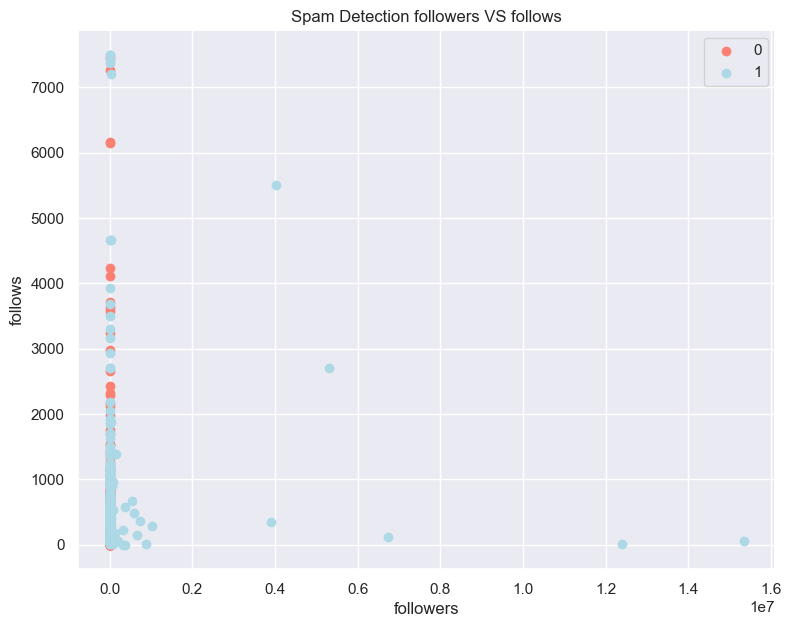

In [9]:
import matplotlib.pyplot as plt
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df.followers[df.fake ==1],
            df.follows[df.fake==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.followers[df.fake ==0],
            df.follows[df.fake ==0],
            c="lightblue")

# Add some helpful info
plt.title("Spam Detection followers VS follows")
plt.xlabel("followers")
plt.ylabel("follows")
plt.legend(["0", "1"]);

Correlation Matrix

(12.5, -0.5)

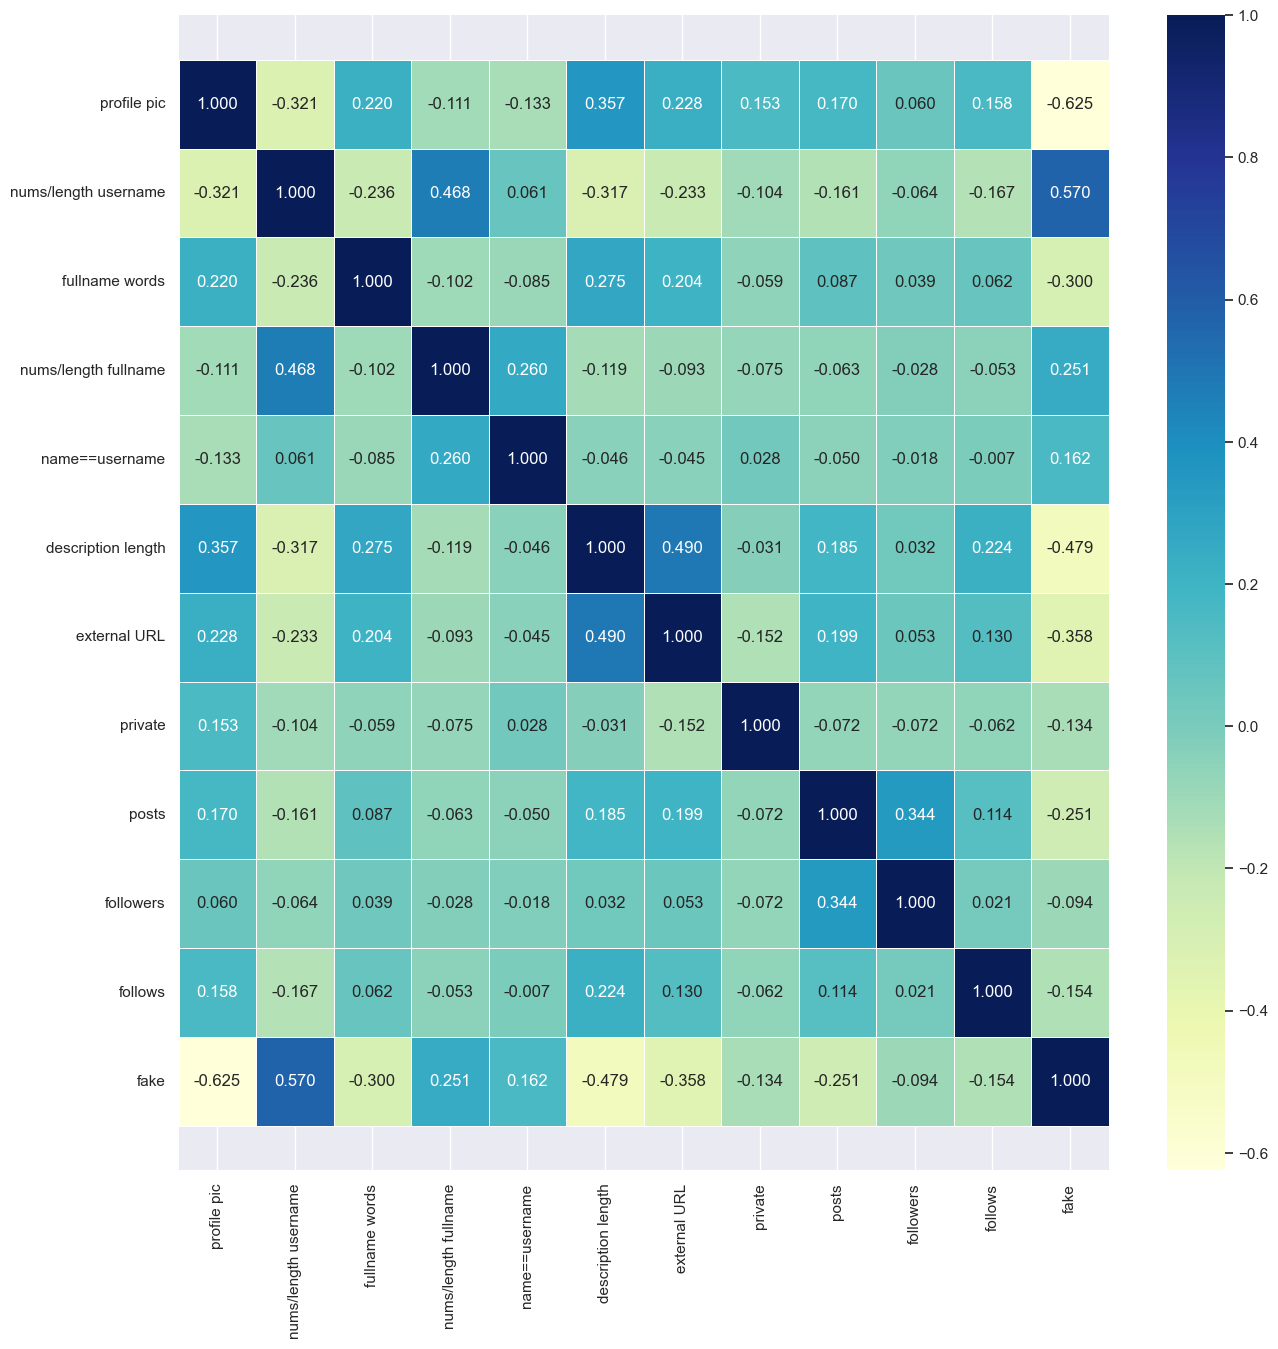

In [10]:
# Let's make our correlation matrix a little prettier
import seaborn as sns
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".3f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Count Number Positive and Negative samples

In [11]:
print(df['fake'].value_counts())

fake
0    348
1    348
Name: count, dtype: int64


In [12]:

df['fake'] = pd.Categorical(df['fake']).codes
print(df)

     profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                   0.0   
1              1                  0.00               2                   0.0   
2              1                  0.10               2                   0.0   
3              1                  0.00               1                   0.0   
4              1                  0.00               2                   0.0   
..           ...                   ...             ...                   ...   
691            1                  0.29               1                   0.0   
692            1                  0.40               1                   0.0   
693            1                  0.00               2                   0.0   
694            0                  0.17               1                   0.0   
695            1                  0.44               1                   0.0   

     name==username  description length

4. Dataset Splitting

In [13]:
def read_dataset(filename):
    return model_selection.train_test_split(df.drop(['fake'], axis=1), df["fake"], train_size=0.8)

In [14]:
Xtrain, Xtest, Ytrain, Ytest = read_dataset(df)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

5. Clasification using Machine Learning Algorithm

**A. SVM**

In [16]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


svm_clf = make_pipeline(StandardScaler(), SVC())
svm_clf.fit(Xtrain, Ytrain)
predictions = svm_clf.predict(Xtest)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(svm_clf, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(svm_clf, Xtrain, Ytrain, Xtest, Ytest, train=False)
joblib.dump(svm_clf, 'svm_clf.sav') 

Predictions: 
 [1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1]

Confusion matrix: 
 [[63  5]
 [ 5 67]]

Evaluation metrics: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        68
           1       0.93      0.93      0.93        72

    accuracy                           0.93       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.93      0.93      0.93       140

Train Result:
Accuracy Score: 90.83%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.872964    0.951807  0.908273    0.912386      0.912102
recall       0.957143    0.858696  0.908273    0.907919      0

['svm_clf.sav']

**B. KNN**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=10, weights='distance', p=1)
clf_knn = make_pipeline(StandardScaler(), neigh)
clf_knn.fit(Xtrain, Ytrain)
predictions = clf_knn.predict(Xtest)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(clf_knn, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(clf_knn, Xtrain, Ytrain, Xtest, Ytest, train=False)

joblib.dump(clf_knn, 'clf_knn.sav') 

Predictions: 
 [1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1]

Confusion matrix: 
 [[62  6]
 [ 4 68]]

Evaluation metrics: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.92      0.94      0.93        72

    accuracy                           0.93       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.93      0.93      0.93       140

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0 

['clf_knn.sav']

**C. DT**

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(Xtrain, Ytrain)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(tree_clf, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(tree_clf, Xtrain, Ytrain, Xtest, Ytest, train=False)

joblib.dump(tree_clf, 'clf_dt.sav') 

Predictions: 
 [1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1]

Confusion matrix: 
 [[62  6]
 [ 4 68]]

Evaluation metrics: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.92      0.94      0.93        72

    accuracy                           0.93       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.93      0.93      0.93       140

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0 

['clf_dt.sav']

**D. Random FOrest**

In [19]:
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier(criterion='entropy', n_estimators=100)
clf_rf = make_pipeline(StandardScaler(), rand_for)
clf_rf.fit(Xtrain, Ytrain)
predictions = clf_rf.predict(Xtest)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(clf_rf, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(clf_rf, Xtrain, Ytrain, Xtest, Ytest, train=False)


Predictions: 
 [1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1]

Confusion matrix: 
 [[65  3]
 [ 7 65]]

Evaluation metrics: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.96      0.90      0.93        72

    accuracy                           0.93       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.93      0.93      0.93       140

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0 